*Import library's*

In [55]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import tweepy
from os import path
from textblob import TextBlob as tb
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
import matplotlib.pyplot as plt
import sys
from importlib import reload
import imp
from textblob.classifiers import NaiveBayesClassifier
import os
import re
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import RegexpParser
from nltk import Tree
from html.parser import HTMLParser
from bs4 import BeautifulSoup

*Twitter authentication*

In [56]:
consumer_key = 'Jg95VukOglg6RIqRrqt6GYRoa'
consumer_secret = 'ZvH3Oz7jFN0OvDMXGtRriTqOOykGnUgqxAU0wNKWhMElII0ivq'
access_token = '971179238396227584-KkOSGzCwhzv0lokz55Dkp1wTjyurnkW'
access_token_secret = 'y2NNUWU1tlhQYMOps49aSKgckRqTu7T7dPWpyNbMeXvAA'

*Twitter API Login*

In [83]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    alltweets = []
    new_tweets = api.search(screen_name)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    while len(new_tweets) > 0:
        new_tweets = api.user_timeline(screen_name,count=200,max_id=oldest)
        alltweets.extend(new_tweets)
        oldest = alltweets[-1].id - 1
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]
    return outtweets

*Get all tweets*

In [58]:
public_tweets = get_all_tweets('@falanext')
df = pd.DataFrame(public_tweets, columns=['id','created_at','text'])
df

,id,created_at,text
0,1058325278160764928,2018-11-02 11:49:43,"b'@falanext vou chamar na DM gente, brigado'"
1,1058306264701300736,2018-11-02 10:34:10,b'@falanext Valeu @falanext \xe2\x9c\x8c\xf0\x...
2,1058244761562177537,2018-11-02 06:29:47,b'@falanext O meu cart\xc3\xa3o j\xc3\xa1 tem ...
3,1058226400518332416,2018-11-02 05:16:49,b'RT @falanext: next tem conta + cart\xc3\xa3o...
4,1058226102953377798,2018-11-02 05:15:38,b'RT @falanext: next tem conta + cart\xc3\xa3o...
5,1058216213677916163,2018-11-02 04:36:20,b'Ol\xc3\xa1 @falanext como fa\xc3\xa7o pra ga...
6,1058213208882724864,2018-11-02 04:24:24,b'@luluahungria @falanext amo vcs'
7,1058186526952222721,2018-11-02 02:38:22,"b'@falanext , me patrocina. \xf0\x9f\x92\x9a H..."
8,1058174958499782656,2018-11-02 01:52:24,b'Obrigado @falanext pelo ingresso p show do J...
9,1058170094474461185,2018-11-02 01:33:05,"b'Que absurdo, est\xc3\xa3o usando o meu cart\..."


*Data Cleaning*

In [59]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessary white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [60]:
data = pd.DataFrame(test_result, columns=['tweet_text'])
data

,tweet_text
0,vou chamar na dm gente brigado
1,
2,o meu cart o j tem dias e n o chegou aqui em c...
3,rt next tem conta cart o de cr dito gr tis e d...
4,rt next tem conta cart o de cr dito gr tis e d...
5,ol como fa o pra ganhar uma vaquinha de pel cia
6,amo vcs
7,me patrocina hahahajjj
8,obrigado pelo ingresso p show do jorge e mateu...
9,que absurdo est o usando o meu cart o do na in...


*Stopwords in portuguese*

In [61]:
stopwords = nltk.corpus.stopwords.words('portuguese')

*Used words*

In [62]:
text = " ".join(tweet for tweet in data.tweet_text)

*WordCloud*

(-0.5, 399.5, 199.5, -0.5)

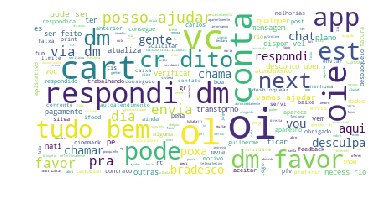

In [63]:
wordcloud = WordCloud(max_font_size=50,stopwords=stopwords,background_color='white').generate(text)
wordcloud.to_file("nouns_user.png")
plt.imshow(wordcloud)
plt.axis("off")

*Counting the words used in the WordCloud*

In [90]:
print ("There are {} words in the combination of all tweets.".format(len(text)))

There are 5994 words in the combination of all tweets.


In [91]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)
public_tweets = api.search('@falanext')

*ReLi Lexicon - portuguese sentimental analysis*

In [92]:
base_path = 'C:/Users/Gabriela/Documents/GitHub/tcc/ReLi-Lex'
train = []
files = [os.path.join(base_path, f) for f in os.listdir(base_path)]

*Read ReLi Lexicon file in directory*

In [93]:
for file in files:
    t = 'pos' if '_Positivos' in file else 'neg'
    with open(file, 'r') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            train.append((w[1:-1], t))

cl = NaiveBayesClassifier(train)

*Tweets classification in positives and negatives*

In [94]:
dados = {}
for tweet in public_tweets:
    blob = tb(tweet.text, classifier=cl)
    for s in blob.sentences:
        print("[%s] %s" % (s.classify(), s))

[pos] @falanext bom dia!
[pos] Gostaria de abrir uma conta no next conjunta com minha irmã.
[pos] Como posso fazer?
[pos] Obrigado
[pos] @falanext A
[pos] RT @falanext: @ovictor_araujo Olá, Victor!
[pos] Pedimos desculpas pelo transtorno causado no seu atendimento!
[pos] @falanext vou chamar na DM gente, brigado
[pos] @falanext Valeu @falanext ✌🏻
[pos] @falanext O meu cartão já tem 30 dias e não chegou aqui em casa vou Cancelar!
[pos] RT @falanext: next tem conta + cartão de crédito grátis e desconto em Uber, iFood, Cinemark e outras marcas.
[pos] Baixe o app e vem!
[pos] https://t.…
[pos] RT @falanext: next tem conta + cartão de crédito grátis e desconto em Uber, iFood, Cinemark e outras marcas.
[pos] Baixe o app e vem!
[pos] https://t.…
[pos] Olá @falanext como faço pra ganhar uma vaquinha de pelúcia?
[pos] @luluahungria @falanext amo vcs
[pos] @falanext , me patrocina.
[pos] 💚 Hahahajjj https://t.co/fBQwTYeKip
[pos] Obrigado @falanext pelo ingresso p show do Jorge e Mateus.
[pos] Ob

Print das informações em formato de dataframe

Consolidação ou contagem de positivos e negativos

Gráfico da análise de sentimentos, baseado na classificação de Naive-Bayes